### 타이타닉

1. 데이터 셋 확인
2. EDA
3. 특성 공학
4. 모델 개발 및 학습
5. 모델 예측 및 평가



In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

In [54]:
# seaborn scheme 로 세팅하고 font_scale 세팅.
plt.style.use('seaborn')
sns.set(font_scale=2.5) 

# 결측데이터를 파악하는데 직관적인 도움을 주는 패키지.
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 브라우저에서 결과 바로 볼 수 있게 해줌.
%matplotlib inline

In [55]:
os.listdir("/content/drive/MyDrive/titanic")

['gender_submission.csv', 'test.csv', 'train.csv']

In [56]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")
df_submit = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")



### 1.데이터 셋 확인

- 데이터가 어떻게 구성되어 있는지 확인한다.
- null data를 확인하고 수정한다.


In [57]:
df_train.shape, df_test.shape, df_submit.shape

# train 할 데이터 수는 891개, test해야 할 데이터 수는 418개를 확인해 볼 수 있다.

((891, 12), (418, 11), (418, 2))

In [58]:
# 칼럼들은 다음과 같다.

df_train.columns

# 칼럼은 12개로 이루어져 있으며, 학습에 사용해야 할  feature는 11개, 
# 예측해야 할 feature는 survived 이다.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [60]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


타이타닉 데이터 feature 설명
- survival : 생존 유무 ( target 변수 )
- plcass : 티켓 클래스 ( 1st, 2nd, 3rd)
- sex : 성별
- age : 나이
- sibsp : 함께 탑승한 형제자매, 배우자 수 총합
- parch : 함께 탑승한 부모, 자녀 수 총합
- ticket : 티켓 넘버
- fare : 탑승 요금
- cabin : 객실 넘버
- bembarked : 탑승 항구

In [63]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
# 결측치 확인

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
# 결측치 비율 확인

df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [67]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

'age'에 약 20%, 'cabin'에 약 80%에 달하는 결측치가 있는것을 확인했다

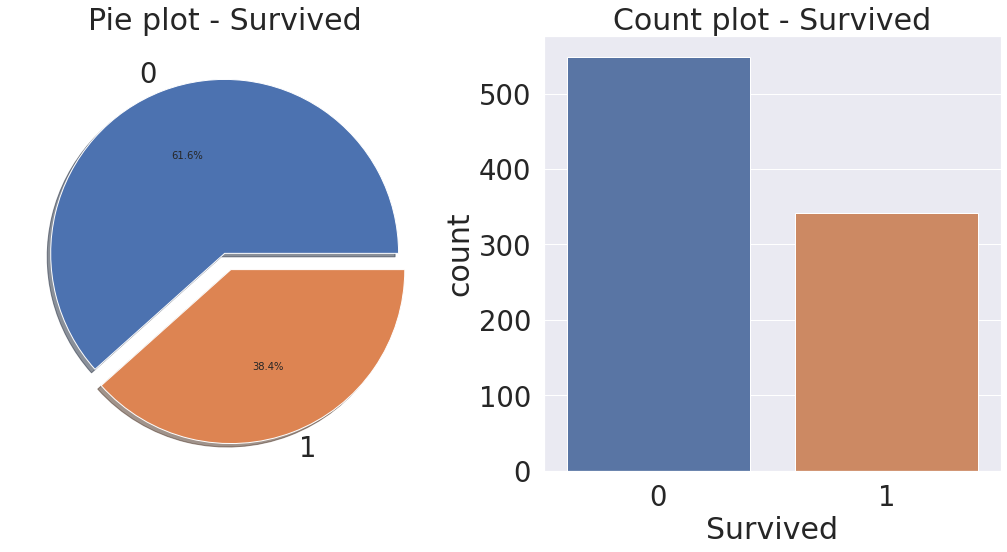

In [69]:
#프레임 나누기
f, ax = plt.subplots(1,2, figsize=(18,8))

# pie plot 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# countplot
sns.countplot('Survived',data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

불균형 데이터인지 먼저 살펴봐야 하는데 다행히도 균형적인 데이터이다.

### 2. 탐색적 데이터 분석

데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요합니다.

1. pclass
: 순서가 있는 데이터 타입
: groupby 나 pivot 메소드를 활용할 것.


In [70]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

# class 1에 216명, 2에 184명, 3에 491명이 있다.

,Survived
Pclass,
1,216
2,184
3,491


In [71]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

# 그 중에서 생존자 수는 136,87,119 명이다.


,Survived
Pclass,
1,136
2,87
3,119


In [72]:
# 이런 작업은 crosstab으로 편하게 할 수 있다.

pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [73]:
# 그래서 생존률은?
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


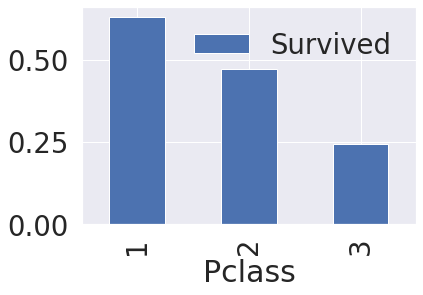

In [74]:
# 시각화 해보기
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

#pclass가 높을 수록 생존률이 올라간 것을 확인할 수 있다.

2.sex

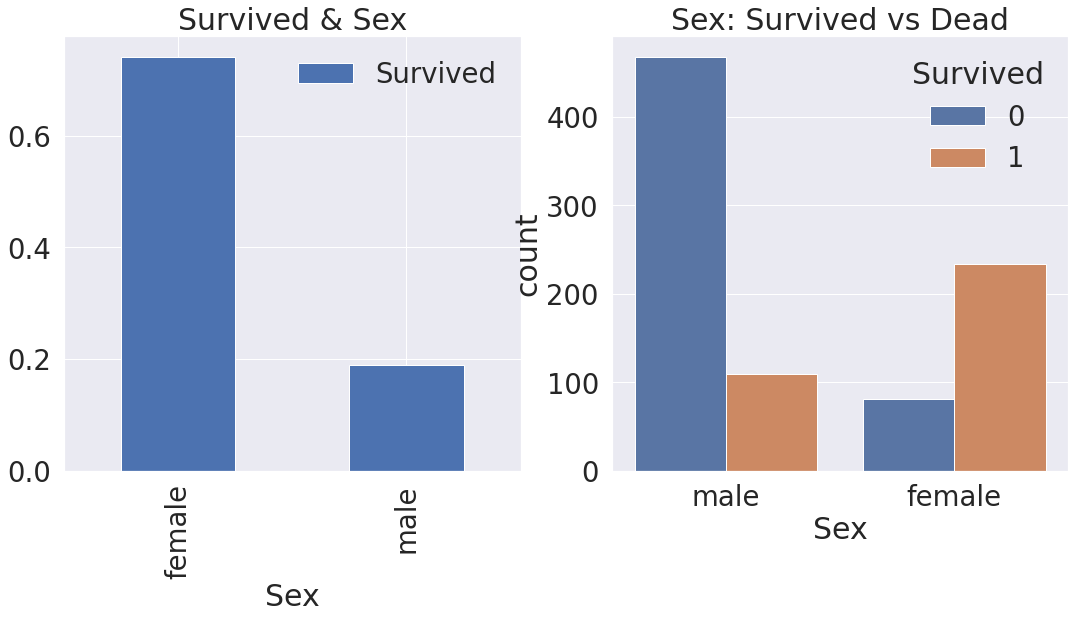

In [75]:
f ,ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived & Sex')
sns.countplot('Sex',hue='Survived', data= df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


3. Sex & Pclass

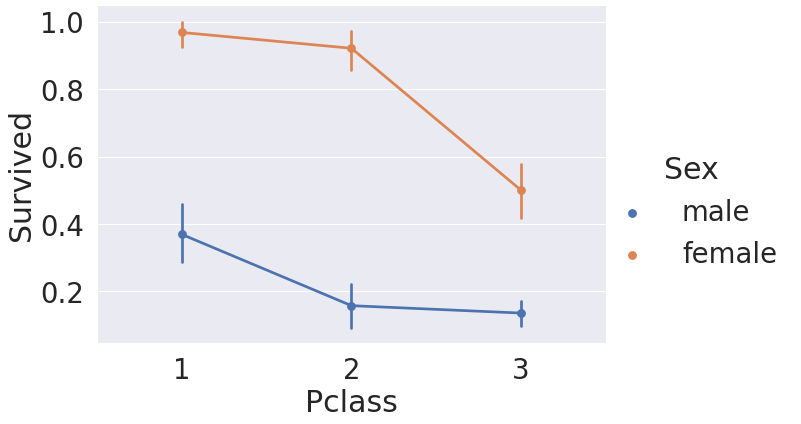

In [76]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train, size=6, aspect=1.5)

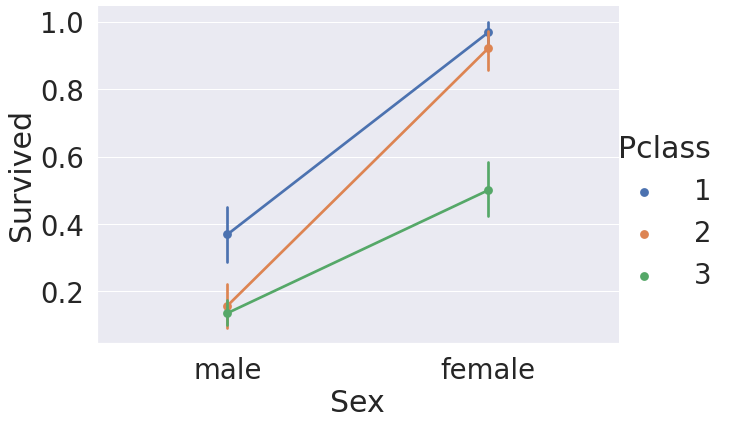

In [77]:
sns.factorplot('Sex','Survived',hue='Pclass',data=df_train, size=6, aspect=1.5)

4. age

In [78]:
maxAge = df_train['Age'].max()
print(f'제일 나이 많은 탑승객 : {maxAge} years')
minAge = df_train['Age'].min()
print(f'제일 나이가 어린 탑승객 : {minAge} years')
aveAge = df_train['Age'].mean()
print(f'탑승객 평균 나이 : {round(aveAge,2)} years')

제일 나이 많은 탑승객 : 80.0 years
제일 나이가 어린 탑승객 : 0.42 years
탑승객 평균 나이 : 29.7 years


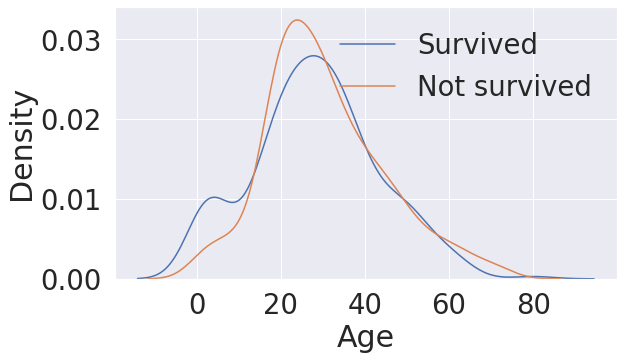

In [79]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived','Not survived'])
plt.show()

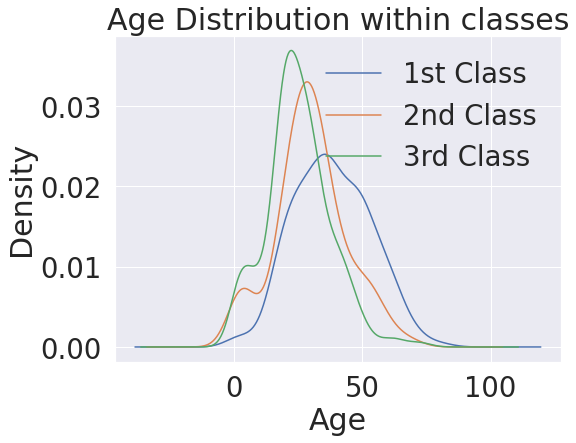

In [80]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])


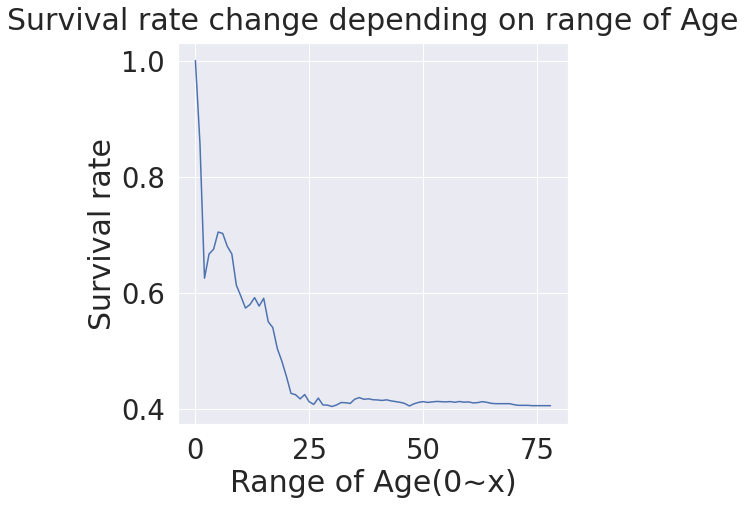

In [81]:
cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

5. embarked


In [82]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

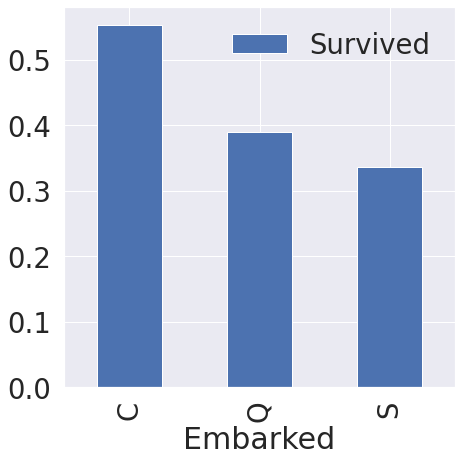

In [83]:
f , ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index = True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax)

생존율을 비교해보니 c > q > s 순서대로 높다.

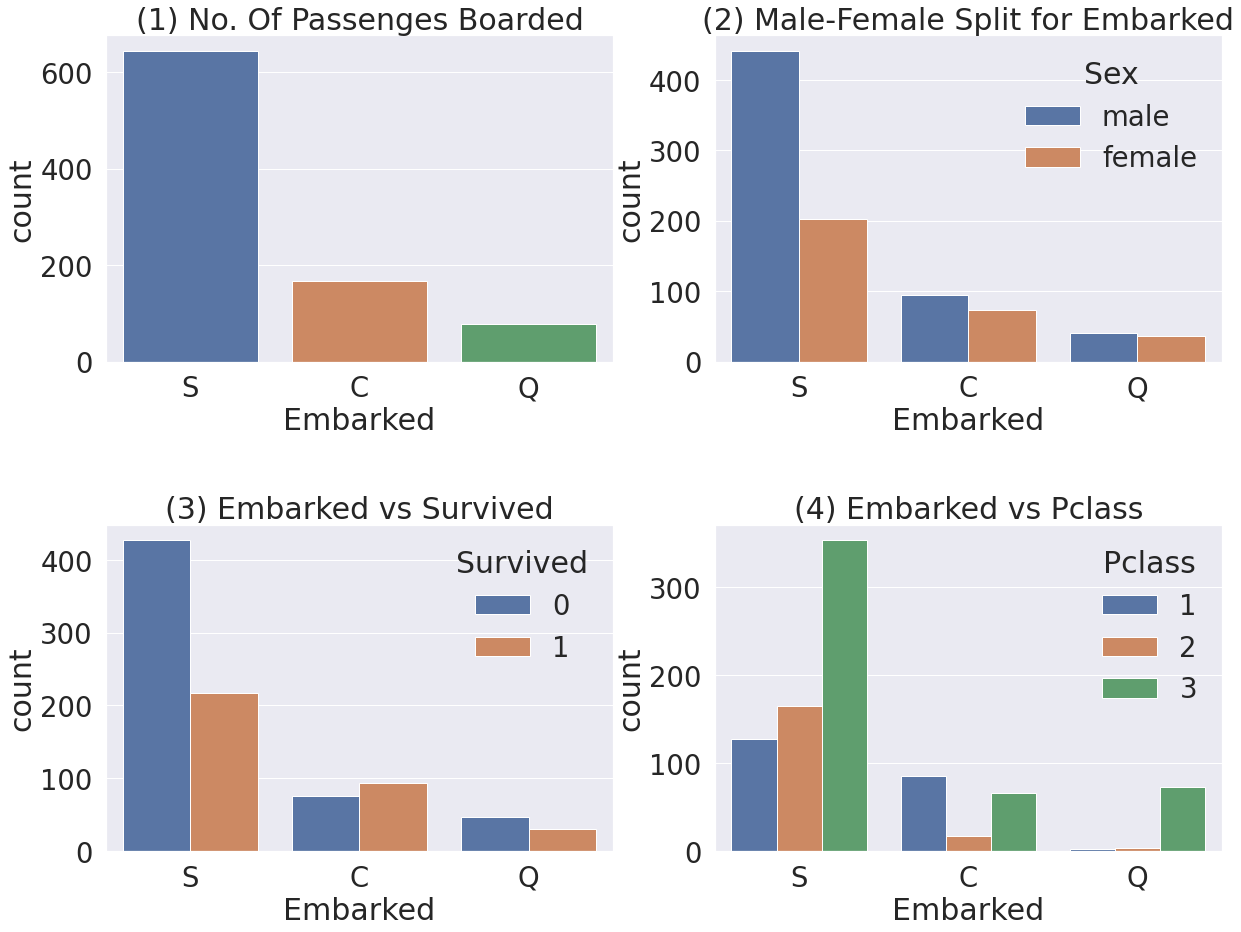

In [84]:
f, ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passenges Boarded')
sns.countplot('Embarked', hue= 'Sex',data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

6. Family<br>
SibSp와 Parch를 합치면 함께 탑승한 가족의 수를 구할 수 있습니다.

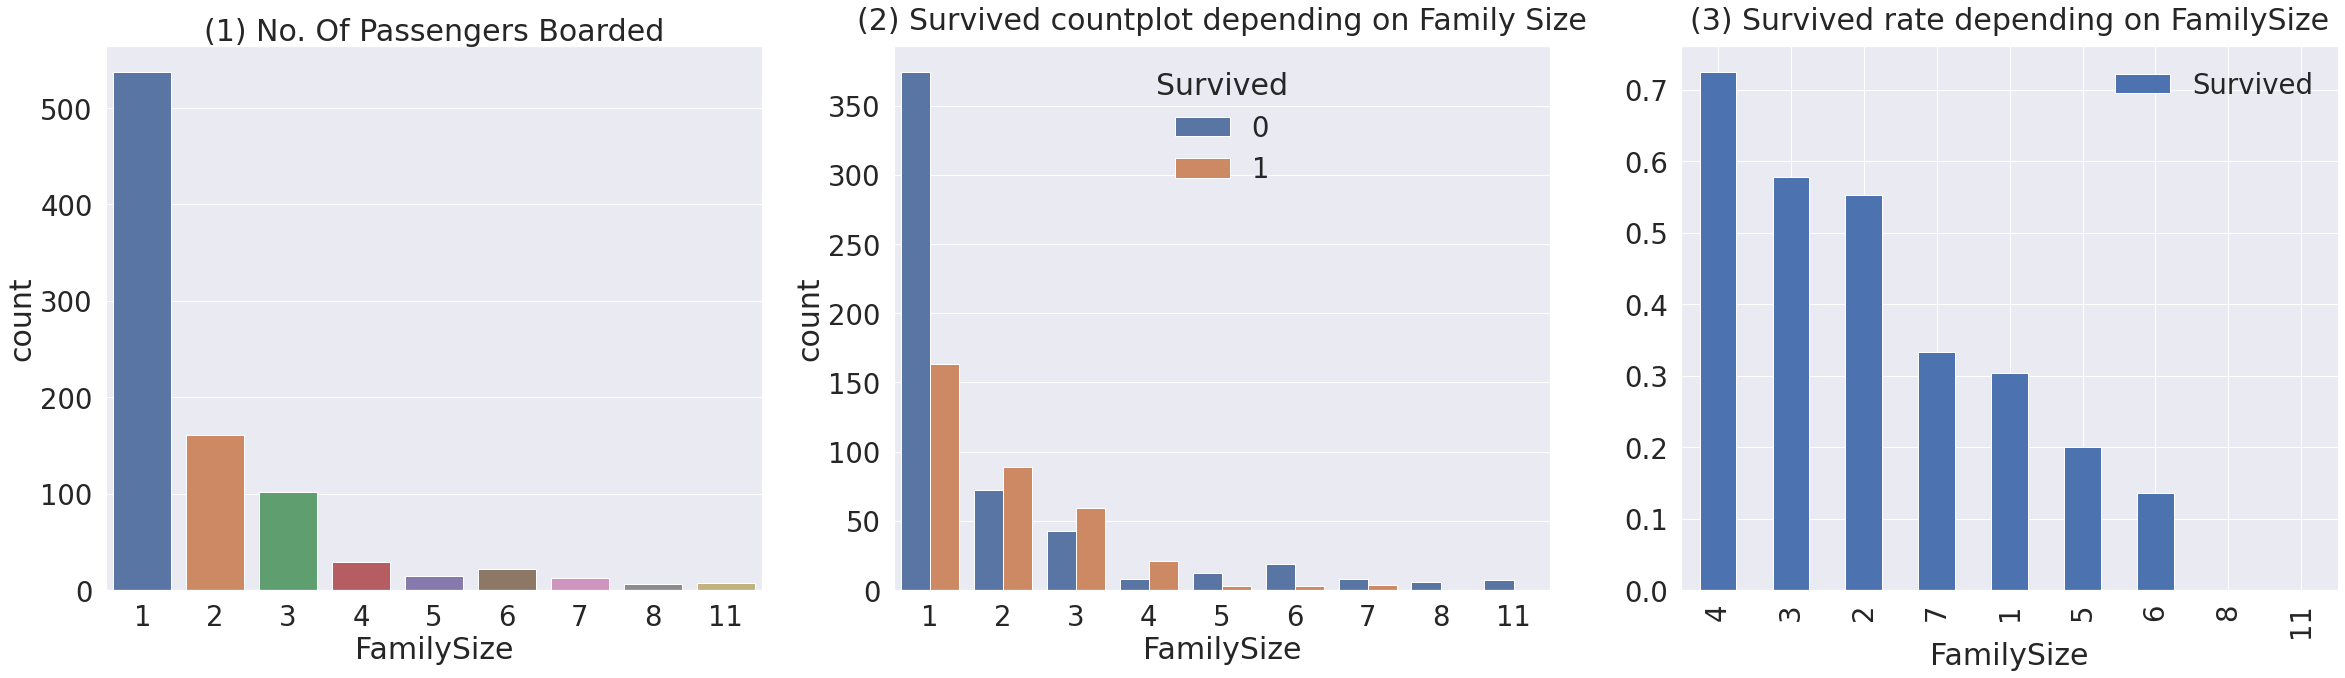

In [95]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data= df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Family Size',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

7. fare

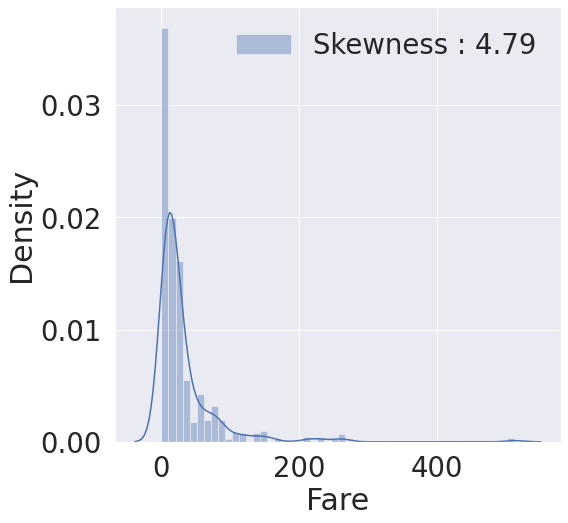

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 비 대칭성이 강하게 보인다.

In [99]:
df_test['Fare'].isnull().sum()

1

In [100]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [101]:
df_test['Fare'].isnull().sum()


0

In [102]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

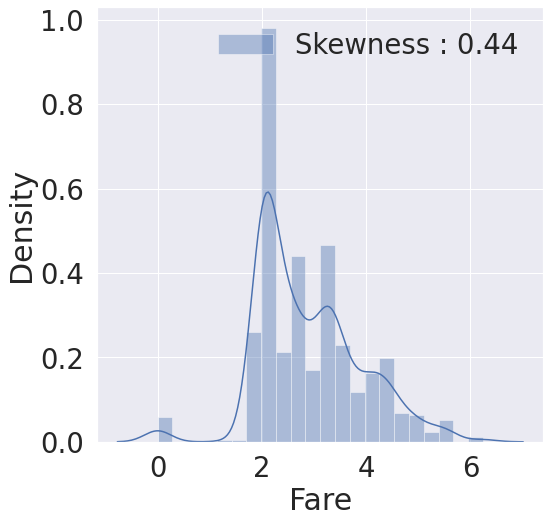

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')



로그를 취해 비대칭성을 해결했다.


8. Cabin


In [105]:
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [106]:
df_train.head()[['PassengerId','Cabin']]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


9. Ticket

In [108]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### 3. 특성공학


In [110]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [111]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

Train 에서는 Age, Cabin, Embarked <br>
Test 에서는 Age, Cabin에서 결측치를 발견

In [113]:
# str extract 정규표현식 사용해서 성을 따로 추출한다.

df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')


In [114]:
# crosstab을 이용하여 initial 과 sex 간의 count를 살펴봅시다.
# crosstab은 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.


pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [115]:
pd.crosstab(df_train['Initial'], df_train['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [116]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [117]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


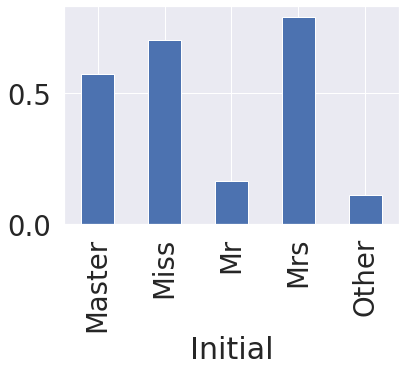

In [118]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [119]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [120]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

In [121]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [122]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]


Cabin       687
Embarked      2
dtype: int64

In [123]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]


Cabin    327
dtype: int64

In [124]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [125]:
df_train['Embarked'].fillna('S', inplace=True)


In [126]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]


Cabin    687
dtype: int64

change Age (continuous to categorical)

In [127]:
# Age를 몇개의 group으로 나누어 category화 시켜줄 수 있습니다.
# 근데 information loss가 생길 수도 있으니 잘 생각해야함.

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)



In [128]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

change initial, embarked and sex (String to Numerical)

In [129]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [130]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [131]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

In [132]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

히트맵을 그려본다 <br>
pearson correlation

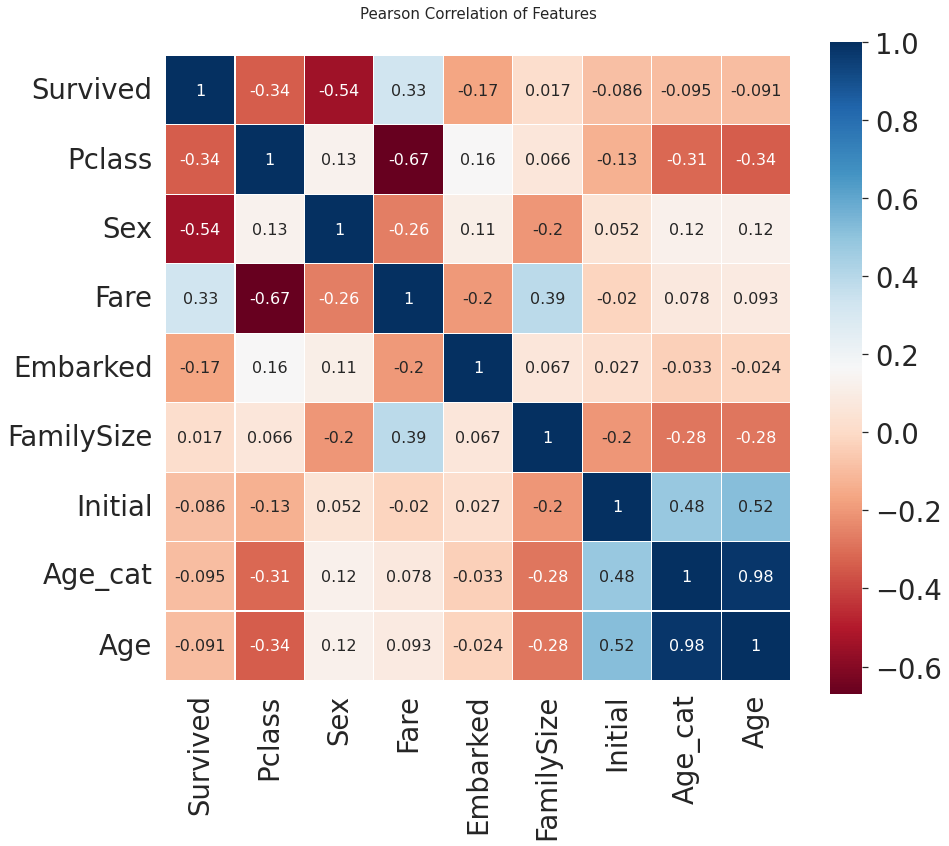

In [135]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

결과 : sex와 pclass가 survived에 어느정도 상관관계가 있음을 볼 수 있다. <br>
fare와 embarked 도 상관관계가 있다.
 

### One hot encoding on initial and embarked



Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4

In [136]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [137]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [138]:
# embarked에도 적용
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

### Drop Columns


In [139]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [140]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [141]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [142]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

## 4. 모델개발 및 학습


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [147]:
#1.train test set 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

X_train.shape, X_test.shape


((891, 14), (418, 14))

In [148]:
#2.train set 에서 validation 나누기
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [149]:
y_tr.shape, y_vld.shape


((712,), (179,))

In [150]:
#3.train으로 학습하고 validation 데이터로 검증해보기
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [151]:
print(100*metrics.accuracy_score(prediction, y_vld))

80.44692737430168


In [152]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

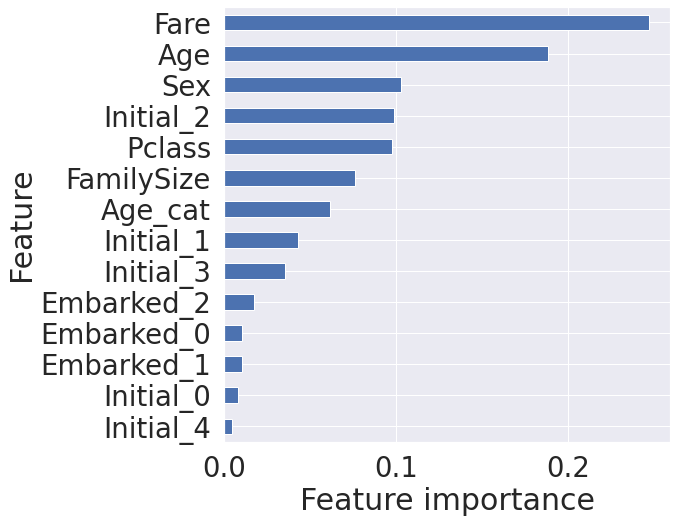

In [153]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## keras를 사용한 NN모델 개발


In [154]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam, SGD

In [155]:
# 기본중에 기본 NN모델 개발

nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [156]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=500,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/500
12/12 [==============================] - 3s 74ms/step - loss: 1.3529 - accuracy: 0.5169 - val_loss: 0.9984 - val_accuracy: 0.6480
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9399 - accuracy: 0.5253 - val_loss: 0.6761 - val_accuracy: 0.6425
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7820 - accuracy: 0.5604 - val_loss: 0.6462 - val_accuracy: 0.6425
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.7893 - accuracy: 0.5506 - val_loss: 0.6363 - val_accuracy: 0.6425
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7830 - accuracy: 0.5520 - val_loss: 0.6393 - val_accuracy: 0.6425
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7540 - accuracy: 0.5435 - val_loss: 0.6392 - val_accuracy: 0.6425
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7232 - accuracy: 0.5590 - val_loss: 0.6377 - val_accuracy: 0.6425
Epoch 8/500


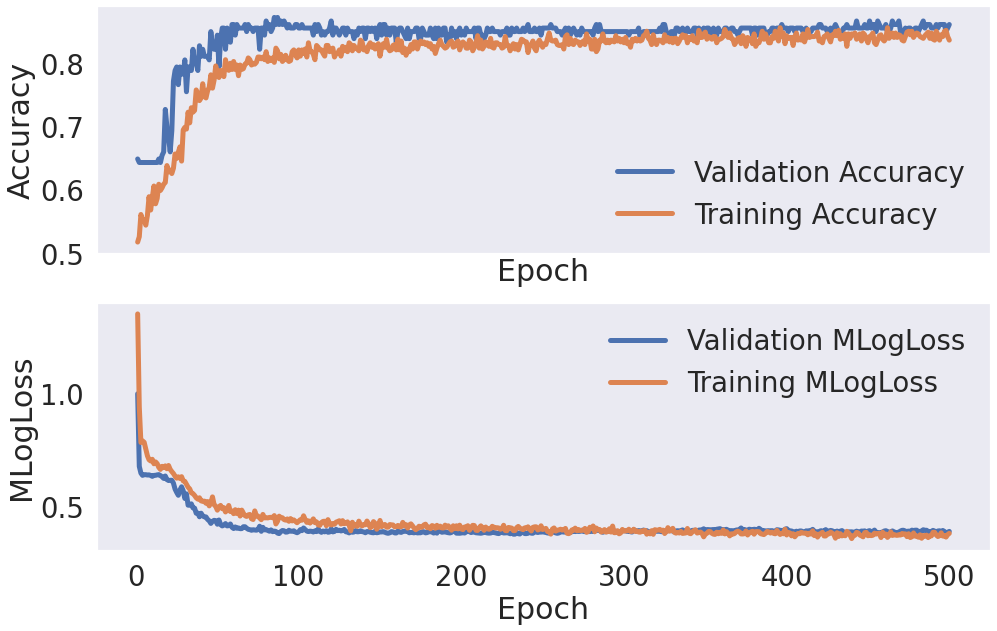

In [159]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')

axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show()

### 5.모델 예측 및 평가

In [160]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [162]:
prediction = model.predict(X_test)
df_submit['Survived'] = prediction

In [163]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [165]:
df_submit.to_csv('first_submission.csv',index=False)

In [166]:
# NN예측 및 평가
submission = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

14/14 [==============================] - 0s 2ms/step


(418,)

In [167]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)

##결과

- NN 모델은 0.75837
- randomforest 모델은 0.74162